## Import data

In [1]:
from pipeline.pipeline import Pipe

`subject_code` - any string for naming result files.

`path_to_eeg` - can be any type of eeg file that MNE's [read_raw](https://mne.tools/stable/generated/mne.io.read_raw.html) function supports.

`path_to_hypno` - visbrain's [point-per-second](http://visbrain.org/sleep.html#save-hypnogram) type of hypnogram

`output_directory` - a directory you want the results to be saved in

`sf_hypno` - hypnogram sampling frequency (visbrain's hypnograms default to 1)

In [7]:
pipe = Pipe(
    subject_code="HZ4",
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\interpolated_raw.fif",
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\HZ4\staging.txt",
    output_directory=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",
    sf_hypno=1)

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\interpolated_raw.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\interpolated_raw-1.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.


24-Jan-23 19:22:59 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


## Preprocessing

### Resampling

`sfreq` - desired sampling frequency

`save` - if true, saves resampled eeg data and metadata in .fif files.

In [4]:
pipe.resample(
    sfreq=250,
    save=True
    )

24-Jan-23 18:00:12 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


Writing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\HZ4_250hz_raw.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\HZ4_250hz_raw-1.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Closing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\HZ4_250hz_raw-1.fif
Closing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\HZ4_250hz_raw.fif
[done]


### Filtering

#### High pass

In [10]:
pipe.plot()

Channels marked as bad:
none


`savefig` - save filter info plot. [FIR filters](https://mne.tools/stable/auto_tutorials/preprocessing/25_background_filtering.html#fir-filters).

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Filter length: 2751 samples (11.004 sec)

Using CUDA for FFT FIR filtering
Setting up band-pass filter from 0.3 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-12 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 124.90 Hz
- Upper transition bandwidth: 0.10 Hz (-12 dB cutoff frequency: 124.95 Hz)
- Fil

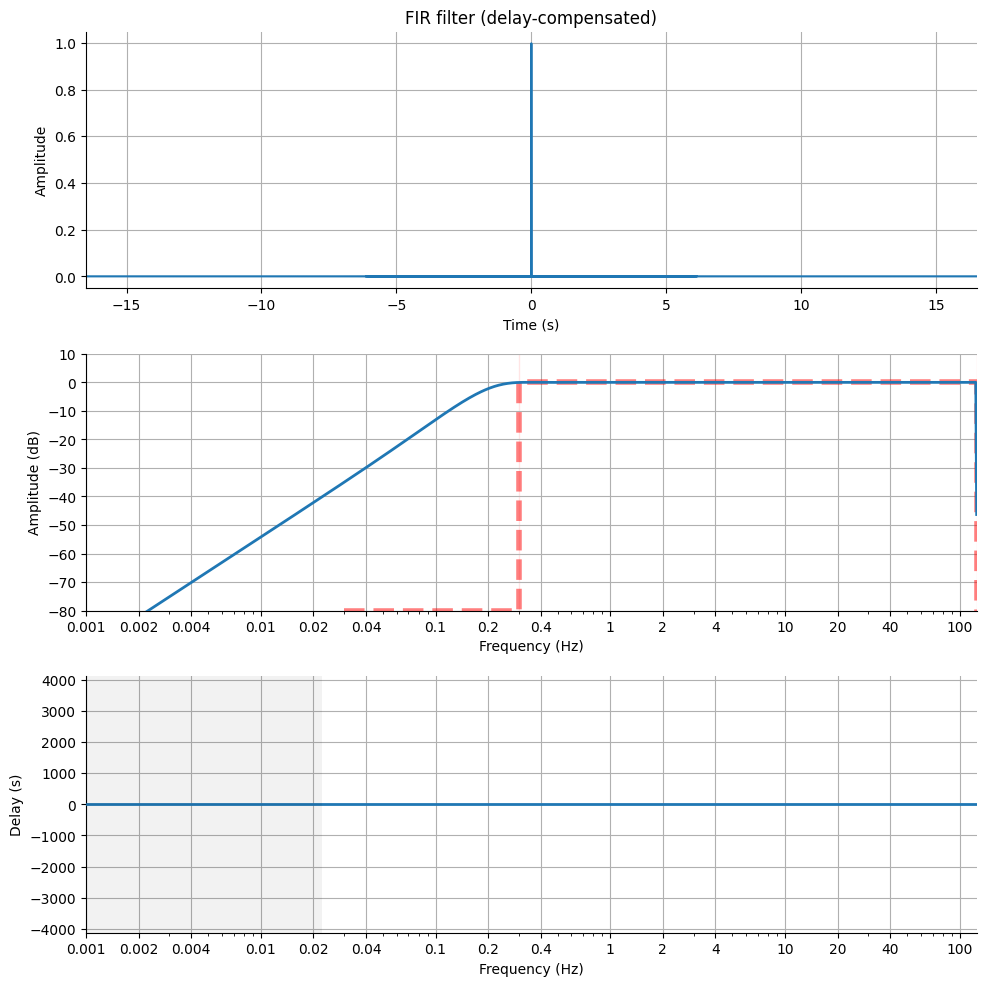

In [5]:
pipe.filter(
    l_freq=0.3, 
    savefig=False)

#### Notch

In [6]:
pipe.notch()

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

Using CUDA for FFT FIR filtering


In [6]:
pipe.plot()

Using qt as 2D backend.
Channels marked as bad:
none


In [7]:
pipe._save_raw('after_highpass_and_notch_raw.fif')

Writing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\after_highpass_and_notch_raw.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\after_highpass_and_notch_raw-1.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Closing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\after_highpass_and_notch_raw-1.fif
Closing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\after_highpass_and_notch_raw.fif
[done]


#### Select bad channels

Create average reference projection

In [8]:
pipe.mne_raw.set_eeg_reference(projection=True)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


<RawMff | signal1.bin, 264 x 2229773 (8919.1 s), ~4.39 GB, data loaded>

Mark bad channels

`save_bad_channels` - if true, saves bad channels to *bad_channels.txt* file.

In [23]:
pipe.plot(
    save_bad_channels=True
)

Channels marked as bad:
['E9', 'E111', 'E145', 'E156', 'E165', 'E174', 'E175', 'E166', 'E187', 'E216', 'E219', 'E181', 'E93', 'E229']


If you want to continue with previously saved bad channels, use `pipe.read_bad_channels()`. The function will import the channels from *bad_channels.txt* file in the output directory.

In [22]:
pipe.read_bad_channels()

#### Interpolate bad channels

Interpolate bad channels by [spherical spline interpolation](https://mne.tools/stable/overview/implementation.html#bad-channel-repair-via-interpolation)

`reset_bads` - bad channels are saved in a txt file, so we can reset it in our current metadata

In [29]:
pipe.mne_raw.interpolate_bads(reset_bads=True)

Interpolating bad channels
    Automatic origin fit: head of radius 96.5 mm
Computing interpolation matrix from 249 sensor positions
Interpolating 8 sensors


<RawMff | signal1.bin, 264 x 2229773 (8919.1 s), ~4.39 GB, data loaded>

In [25]:
pipe.plot()

Channels marked as bad:
none


In [31]:
pipe._save_raw('interpolated_raw.fif')

Writing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\interpolated_raw.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\interpolated_raw-1.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Closing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\interpolated_raw-1.fif
Closing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\interpolated_raw.fif
[done]


#### Select bad epochs

In [12]:
pipe.plot(butterfly=True, save_annotations=True)

Channels marked as bad:
none
Overwriting existing file.


If you want to continue with previously saved annotations, use `pipe.read_annotations()`. The function will import the annotations from *annotations.txt* file in the output directory.

In [3]:
pipe.read_annotations()

c:\Users\Gennadiy\Documents\eeg-processing-pipeline\pipeline\pipeline.py:105: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.mne_raw.set_annotations(read_annotations(self.output_dir / 'annotations.txt'))


## Results

### Hypnospectrogram

Setting 192715 of 2229773 (8.64%) samples to NaN, retaining 2037058 (91.36%) samples.


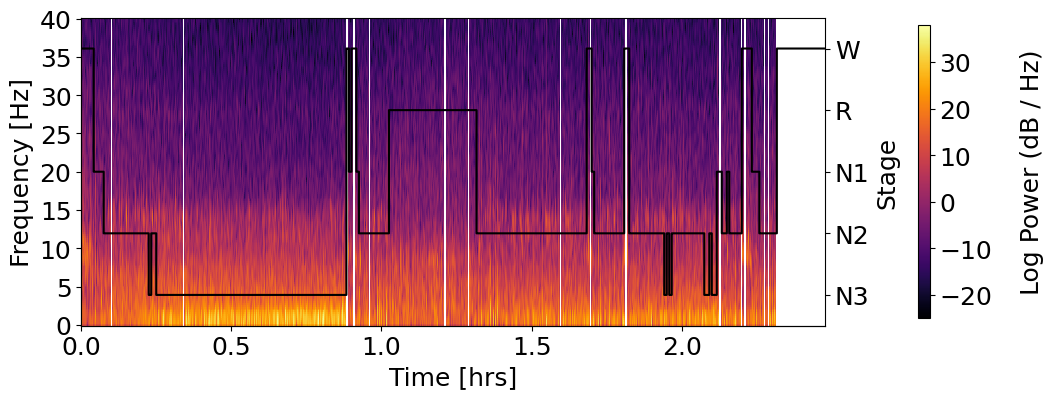

In [14]:
pipe.plot_hypnospectrogram(
    picks=['E101'],
    win_sec=4,
    freq_range=(0, 40),
    cmap='inferno',
    overlap=True,
    save=True)

### Power Spectral Density

Setting 192715 of 2229773 (8.64%) samples to NaN, retaining 2037058 (91.36%) samples.


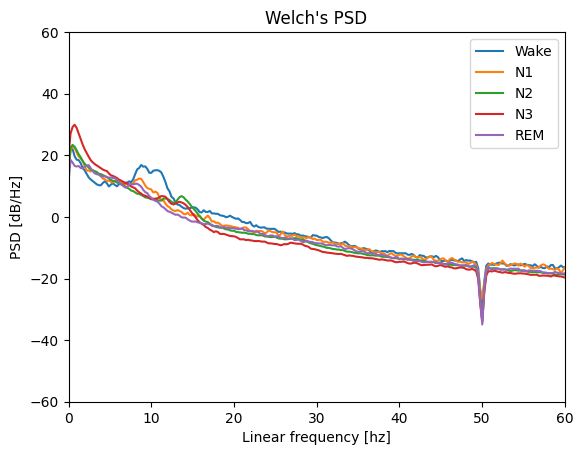

In [16]:
pipe.plot_psd_per_stage(
    picks=['E101'], 
    sec_per_seg=4.096,
    psd_range=(-60, 60),
    freq_range=(0, 60),
    xscale='linear',
    sleep_stages={'Wake' :0, 'N1' :1, 'N2': 2, 'N3': 3, 'REM': 4},
    save=True)

### Sleep Stats

In [16]:
pipe.sleep_stats(save_to_csv=True)

#### Set channels types

In [ ]:
EOG = {channel:'eog' for channel in ['E10', 'E46', 'E226', 'E252']}
EMG = {channel:'emg' for channel in ['E247', 'E237']}
RESP = {channel:'resp' for channel in ['Resp.Effort.Chest', 'Resp.Effort.Abd', 'Resp.Pressure']}
CHANNELS = EMG|EOG|RESP
pipe.mne_raw.set_channel_types(CHANNELS)

<RawMff | signal1.bin, 264 x 8919091 (8919.1 s), ~358 kB, data not loaded>